# Notebook to Investigate $f_{1}(1285)\rightarrow a_{0}\pi$

In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import my_library.common_analysis_tools as ct
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.gStyle.SetOptStat(0)
ROOT.EnableImplicitMT()

In [3]:
df_pipkmks = ct.get_dataframe('pipkmks', 'spring', 'data')
df_pimkpks = ct.get_dataframe('pimkpks', 'spring', 'data')

In [4]:
df_pipkmks = df_pipkmks.Define('kk_px', 'km_px + ks_px')
df_pipkmks = df_pipkmks.Define('kk_py', 'km_py + ks_py')
df_pipkmks = df_pipkmks.Define('kk_pz', 'km_pz + ks_pz')
df_pipkmks = df_pipkmks.Define('kk_E', 'km_E + ks_E')
df_pipkmks = df_pipkmks.Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')

df_pimkpks = df_pimkpks.Define('kk_px', 'kp_px + ks_px')
df_pimkpks = df_pimkpks.Define('kk_py', 'kp_py + ks_py')
df_pimkpks = df_pimkpks.Define('kk_pz', 'kp_pz + ks_pz')
df_pimkpks = df_pimkpks.Define('kk_E', 'kp_E + ks_E')
df_pimkpks = df_pimkpks.Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')

In [5]:
hist1d_kk_pipkmks = df_pipkmks.Histo1D(('kkm_pipkmks', 'M(K^{-}K_{S}) GeV', 150, 0.9, 1.6), 'kk_m').GetValue()
hist1d_kk_pimkpks = df_pimkpks.Histo1D(('kkm_pimkpks', 'M(K^{+}K_{S}) GeV', 150, 0.9, 1.6), 'kk_m').GetValue()
hist2d_kk_kkpi_pipkmks = df_pipkmks.Histo2D(('kk_kkpi_pipkmks', 'M(K^{-}K_{S}) vs M(K^{-}K_S}#pi^{+}) GeV', 70, 1.1, 1.8, 150, 0.9, 1.6), 'pipkmks_m', 'kk_m').GetValue()
hist2d_kk_kkpi_pimkpks = df_pimkpks.Histo2D(('kk_kkpi_pimkpks', 'M(K^{+}K_{S}) vs M(K^{+}K_S}#pi^{-}) GeV', 70, 1.1, 1.8, 150, 0.9, 1.6), 'pimkpks_m', 'kk_m').GetValue()


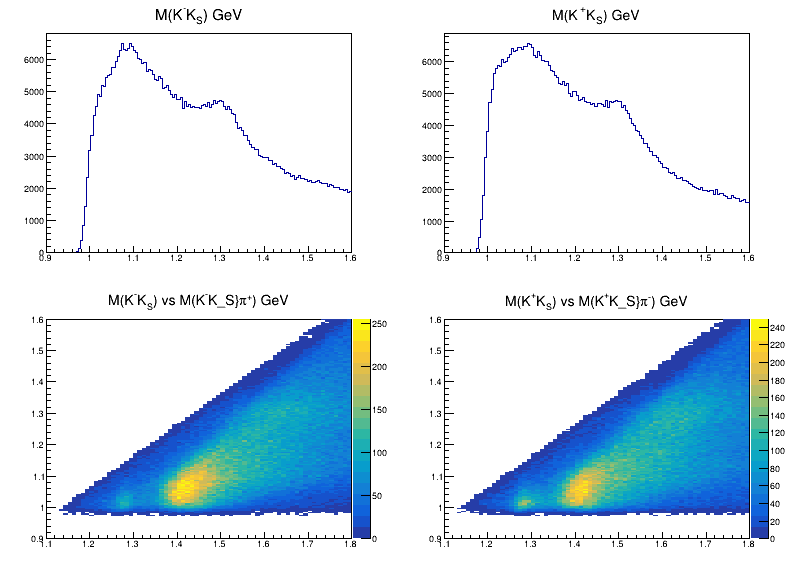

In [6]:
c = ROOT.TCanvas("c","c",800,600)
c.cd()
c.Divide(2,2)
c.cd(1)
hist1d_kk_pipkmks.Draw()
c.cd(2)
hist1d_kk_pimkpks.Draw()
c.cd(3)
hist2d_kk_kkpi_pipkmks.Draw("colz")
c.cd(4)
hist2d_kk_kkpi_pimkpks.Draw("colz")
c.Draw()

In [9]:
# hist_kkpi_a0_pipkmks = df_pipkmks.Filter('kk_m <= 1.05').Histo1D(('pipkmks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 60, 1.1, 1.7), 'pipkmks_m').GetValue()
hist_kkpi_a0_pipkmks = df_pipkmks.Filter('kk_m <= 1.119').Histo1D(('pipkmks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 60, 1.1, 1.7), 'pipkmks_m').GetValue()
# hist_kkpi_a0_pimkpks = df_pimkpks.Filter('kk_m <= 1.05').Histo1D(('pimkpks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 60, 1.1, 1.7), 'pimkpks_m').GetValue()
hist_kkpi_a0_pimkpks = df_pimkpks.Filter('kk_m <= 1.119').Histo1D(('pimkpks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 60, 1.1, 1.7), 'pimkpks_m').GetValue()
hist_kkpi_a0_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['blue']))
hist_kkpi_a0_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['red']))

hist_kkpi_kstar_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Histo1D(('pipkmks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 60, 1.1, 1.7), 'pipkmks_m').GetValue()
hist_kkpi_kstar_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Histo1D(('pimkpks_m', 'M(K^{#pm}K_{S}#pi^{#mp}) GeV', 60, 1.1, 1.7), 'pimkpks_m').GetValue()
hist_kkpi_kstar_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['jungle green']))
hist_kkpi_kstar_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['ruby red']))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


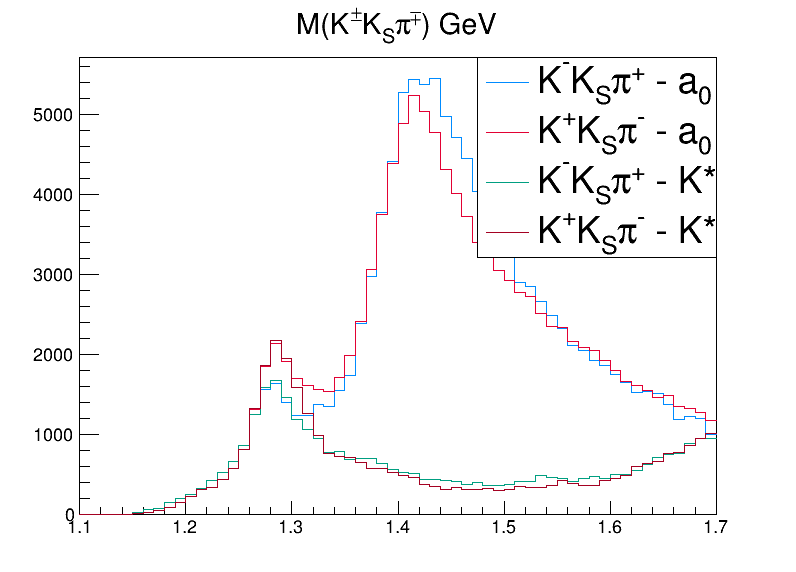

In [10]:
legend = ROOT.TLegend(0.6,0.55,0.9,0.9)
legend.AddEntry(hist_kkpi_a0_pipkmks,"K^{-}K_{S}#pi^{+} - a_{0}", "l")
legend.AddEntry(hist_kkpi_a0_pimkpks,"K^{+}K_{S}#pi^{-} - a_{0}", "l")
legend.AddEntry(hist_kkpi_kstar_pipkmks,"K^{-}K_{S}#pi^{+} - K*", "l")
legend.AddEntry(hist_kkpi_kstar_pimkpks,"K^{+}K_{S}#pi^{-} - K*", "l")

c1 = ROOT.TCanvas("c1","c1",800,600)
c1.cd()
c1.cd(1)
hist_kkpi_a0_pipkmks.Draw()
c1.cd(2)
hist_kkpi_a0_pimkpks.Draw('same')
c1.cd(3)
hist_kkpi_kstar_pipkmks.Draw('same')
c1.cd(4)
hist_kkpi_kstar_pimkpks.Draw('same')
legend.Draw()
c1.Draw()